In [ ]:
import pandas as pd
import os
import time
import requests
import json
import csv
from tqdm import tqdm

import tweepy

import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.chdir("gdrive/My Drive/Colab Notebooks/API_data")

Mounted at /content/gdrive


In [ ]:
consumer_key = 'Yf97lN35cmpNjqvs4YloK5bgj'
consumer_secret = 'gtx7aYcUfP8xR4UcSP53h7HkVnq8oUnn3hQgH24tKmMPJ9wZlw'
access_token = '1453449116302860297-8CBLV2AMCBbMQcmzyzxr9beZo03EkU'
access_token_secret = 'll1zMrp5eaTOxLYXrO8lhaph7IL4paJ4PjAdkrri6ILKY'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAABVsegEAAAAASKd3LMyDMSW7bO6pWA0iF9R23cM%3DsCTiS4uKWVzw9tqUhmvD5NDL6zbnd2NCO5BK66jcG3uanmxz6D'

In [ ]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth) 

In [ ]:
# define search_twitter function
def search_twitter(query, max_results,tweet_fields, bearer_token = bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&max_results={}&{}".format(query, max_results,tweet_fields)
    print("--------------",url,"--------------")
    response = requests.request("GET", url, headers=headers)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [ ]:
tweet_fields = "tweet.fields=text,author_id,created_at,lang"
search_tweets = ['health insurance','medical insurance','medical plan','health care','medicare','medicaid','insurance','health insurance plan','deductible','coinsurance']
for idx,val in enumerate(search_tweets):
    tweets_jsondump = []
    json_response1 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)
    json_response2 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)
    json_response3 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)

    for i in json_response1['data']:
        tweets_jsondump.append(i)
    for i in json_response2['data']:
        tweets_jsondump.append(i)
    for i in json_response3['data']:
        tweets_jsondump.append(i)
    with open('tweets'+str(val)+'.json','w') as json_file:
        json.dump(tweets_jsondump,json_file)
        json_file.close()

-------------- https://api.twitter.com/2/tweets/search/recent?query=health insurance&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=health insurance&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=health insurance&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=medical insurance&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=medical insurance&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=medical insurance&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.co

In [ ]:
import os, json
import pandas as pd
json_files = [pos_json for pos_json in os.listdir('./') if pos_json.endswith('.json')]
print(json_files) 

['tweets health insurance.json', 'tweetsmedical plan.json', 'tweetsmedical insurance.json', 'tweetshealth care.json', 'tweetsmedicare.json', 'tweetsmedicaid.json', 'tweetsinsurance.json', 'tweetshealth insurance plan.json', 'tweetscoinsurance.json', 'tweetsdeductible.json', 'tweetshealth insurance.json']


       words  count
0      covid      0
1    vaccine      3
2     policy     36
3     health    928
4     doctor     93
5   patients     33
6  insurance   1223
7      cover    383
8   medicaid     21
9   medicare     12


Text(0, 0.5, 'Count')

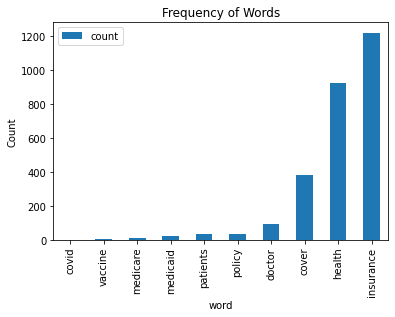

In [ ]:
tweet_fields = "tweet.fields=text,author_id,created_at,lang"
search_tweets = ['covid','vaccine','policy','health','doctor','patients','insurance','cover','medicaid','medicare']
#client = tweepy.Client(bearer_token)

df = pd.DataFrame({'words':search_tweets,'count':[0]*10})

for idx, val in enumerate(json_files):
    open_json = open('./'+val)
    load_json = json.load(open_json)
    df_tweet = pd.DataFrame(load_json)
    for word in search_tweets:
        for i in range(len(df_tweet.text)): 
            if word in df_tweet['text'][i]:# condition satisfied?
                df.loc[df['words']==word,'count'] += 1

print(df)

ax = df.sort_values('count').plot(x = 'words',y='count',kind='bar')
ax.set_title('Frequency of Words')
ax.set_xlabel('word')
ax.set_ylabel('Count')